<a href="https://colab.research.google.com/github/juniorsantin1992/Analise-de-dados-da-Pandemia-Covid-19/blob/main/Analista_de_dados_atualizada_corrigido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---



# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Análise Exploratória de Dados;</li>
  <li>Visualização Interativa de Dados;</li>
  <li>Storytelling.</li>
</ol>

---

## 1\. Introdução

### **1.1. TLDR**

 - **Dashboard**:
  - Google Data Studio (https://lookerstudio.google.com/s/u9erlx_tK1w).
 - **Processamento**:
  - Kaggle Notebook (https://www.kaggle.com/code/juniorsantin/analise-de-dados-da-pandemia-covid-19).
 - **Fontes**:
  - Casos pela universidade John Hopkins ([link](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports));
  - Vacinação pela universidade de Oxford ([link](https://covid.ourworldindata.org/data/owid-covid-data.csv)).

### **1.2. Pandemia Coronavírus 2019**

> A COVID-19 é uma infecção respiratória aguda causada pelo coronavírus SARS-CoV-2, potencialmente grave, de elevada transmissibilidade e de distribuição global. Fonte: Governo brasileiro ([link](https://www.gov.br/saude/pt-br/coronavirus/o-que-e-o-coronavirus)).

A disponibilidade de dados sobre a evolução da pandemia no tempo em uma determinada região geográfica é fundamental para o seu combate! Este projeto busca construir um dashboard de dados para exploração e visualização interativa de dados sobre o avanço de casos e da vacinação do Brasil. O processamento de dados está neste `link` e o dashboard, neste `link`.

### **1.3. Dados**

Os dados sobre **casos da COVID-19** são compilados pelo centro de ciência de sistemas e engenharia da universidade americana **John Hopkins** ([link](https://www.jhu.edu)). Os dados são atualizados diariamente deste janeiro de 2020 com uma granularidade temporal de dias e geográfica de regiões de países (estados, condados, etc.). O website do projeto pode ser acessado neste [link](https://systems.jhu.edu/research/public-health/ncov/) enquanto os dados, neste [link](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports). Abaixo estão descritos os dados derivados do seu processamento.

 - **date**: data de referência;
 - **state**: estado;
 - **country**: país;
 - **population**: população estimada;
 - **confirmed**: número acumulado de infectados;
 - **confirmed_1d**: número diário de infectados;
 - **confirmed_moving_avg_7d**: média móvel de 7 dias do número diário de infectados;
 - **confirmed_moving_avg_7d_rate_14d**: média móvel de 7 dias dividido pela média móvel de 7 dias de 14 dias atrás;
 - **deaths**: número acumulado de mortos;
 - **deaths_1d**: número diário de mortos;
 - **deaths_moving_avg_7d**: média móvel de 7 dias do número diário de mortos;
 - **deaths_moving_avg_7d**: média móvel de 7 dias dividido pela média móvel de 7 dias de 14 dias atrás;
 - **month**: mês de referência;
 - **year**: ano de referência.

Os dados sobre **vacinação da COVID-19** são compilados pelo projeto Nosso Mundo em Dados (*Our World in Data* ou OWID) da universidade britânica de **Oxford** ([link](https://www.ox.ac.uk)). Os dados são **atualizados diariamente** deste janeiro de 2020 com uma **granularidade temporal de dias e geográfica de países**. O website do projeto pode ser acessado neste [link](https://ourworldindata.org) enquanto os dados, neste [link](https://covid.ourworldindata.org/data/owid-covid-data.csv). Abaixo estão descritos os dados derivados do seu processamento.

 - **date**: data de referência;
 - **country**: país;
 - **population**: população estimada;
 - **total**: número acumulado de doses administradas;
 - **one_shot**: número acumulado de pessoas com uma dose;
 - **one_shot_perc**: número acumulado relativo de pessoas com uma dose;
 - **two_shots**: número acumulado de pessoas com duas doses;
 - **two_shot_perc**: número acumulado relativo de pessoas com duas doses;
 - **three_shots**: número acumulado de pessoas com três doses;
 - **three_shot_perc**: número acumulado relativo de pessoas com três doses;
 - **month**: mês de referência;
 - **year**: ano de referência.

## 2\. Análise Exploratória de Dados

Nesta sessão vamos utilizar os seguintes pacotes Python para processar os dados bruto em um formato adequado para um painel para exploração interativa de dados.

In [61]:
import math
from typing import Iterator
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


import numpy as np
import pandas as pd

### **2.1. Casos**

Vamos processar os dados de **casos** da universidade John Hopkins.



#### **2.1.1. Extração**

O dado está compilado em um arquivo por dia, exemplo para 2021/12/01.

In [62]:
cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-12-2021.csv', sep=',')

In [63]:
cases.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-13 05:22:15,33.93911,67.709953,53584,2301,44608,6675,Afghanistan,137.647787,4.294192
1,NaN,NaN,NaN,Albania,2021-01-13 05:22:15,41.15330,20.168300,64627,1252,38421,24954,Albania,2245.708527,1.937271
2,NaN,NaN,NaN,Algeria,2021-01-13 05:22:15,28.03390,1.659600,102641,2816,69608,30217,Algeria,234.067409,2.743543
3,NaN,NaN,NaN,Andorra,2021-01-13 05:22:15,42.50630,1.521800,8682,86,7930,666,Andorra,11236.653077,0.990555
4,NaN,NaN,NaN,Angola,2021-01-13 05:22:15,-11.20270,17.873900,18343,422,15512,2409,Angola,55.811022,2.300605


Portanto, precisaremos iterar dentro de um intervalo de tempo definido para extraí-lo.

In [64]:
def date_range(start_date: datetime, end_date: datetime) -> Iterator[datetime]:
  date_range_days: int = (end_date - start_date).days
  for lag in range(date_range_days):
    yield start_date + timedelta(lag)

In [65]:
start_date = datetime(2021,  1,  1)
end_date   = datetime(2021, 12, 31)

De maneira iterativa, vamos selecionar as colunas de interesse e as linhas referentes ao Brasil.

In [66]:
cases = None
cases_is_empty = True

for date in date_range(start_date=start_date, end_date=end_date):

  date_str = date.strftime('%m-%d-%Y')
  data_source_url = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{date_str}.csv'

  case = pd.read_csv(data_source_url, sep=',')

  case = case.drop(['FIPS', 'Admin2', 'Last_Update', 'Lat', 'Long_', 'Recovered', 'Active', 'Combined_Key', 'Case_Fatality_Ratio'], axis=1)
  case = case.query('Country_Region == "Brazil"').reset_index(drop=True)
  case['Date'] = pd.to_datetime(date.strftime('%Y-%m-%d'))
  if cases_is_empty:
    cases = case
    cases_is_empty = False
  else:
    cases = pd.concat([cases, case], axis= 0, ignore_index=True)

In [67]:
cases.query('Province_State == "Sao Paulo"').head()

,Province_State,Country_Region,Confirmed,Deaths,Incident_Rate,Date
24,Sao Paulo,Brazil,1466191,46775,3192.990778,2021-01-01
51,Sao Paulo,Brazil,1467953,46808,3196.827966,2021-01-02
78,Sao Paulo,Brazil,1471422,46845,3204.382565,2021-01-03
105,Sao Paulo,Brazil,1473670,46888,3209.278136,2021-01-04
132,Sao Paulo,Brazil,1486551,47222,3237.329676,2021-01-05


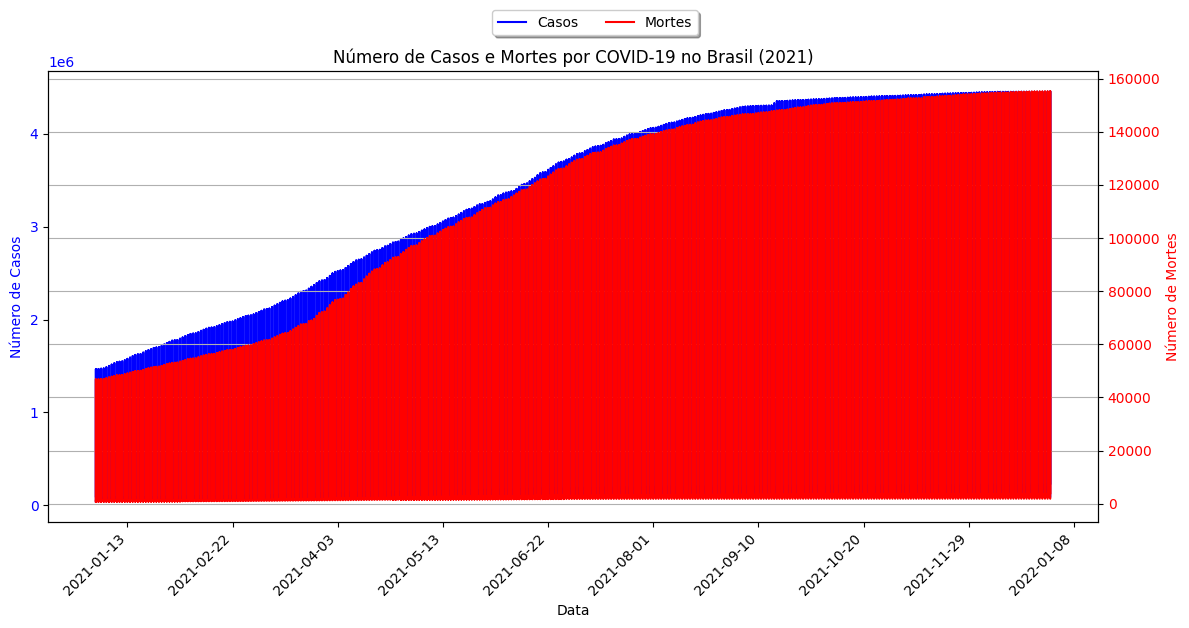

In [68]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filtrando os dados para o Brasil
# Changed 'country' to 'Country_Region' to match the column name in the DataFrame
brazil_cases = cases[cases['Country_Region'] == 'Brazil']

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotando o número de casos
ax1.plot(brazil_cases['Date'], brazil_cases['Confirmed'], label='Casos', color='blue')  # Changed 'date' to 'Date' and 'confirmed' to 'Confirmed'
ax1.set_xlabel('Data')
ax1.set_ylabel('Número de Casos', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criando um segundo eixo para o número de mortes
ax2 = ax1.twinx()
ax2.plot(brazil_cases['Date'], brazil_cases['Deaths'], label='Mortes', color='red')  # Changed 'date' to 'Date' and 'deaths' to 'Deaths'
ax2.set_ylabel('Número de Mortes', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Formatando o eixo x para mostrar as datas
ax1.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))  # Define o número máximo de ticks no eixo x
fig.autofmt_xdate(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade

# Adicionando título e legenda
plt.title('Número de Casos e Mortes por COVID-19 no Brasil (2021)')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True, shadow=True)

# Exibindo o gráfico
plt.grid(True)  # Adiciona uma grade ao gráfico para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()

* O gráfico apresenta duas linhas, uma representando o número de casos confirmados de COVID-19 e outra representando o número de mortes por COVID-19 no Brasil ao longo de 2021.

* É possível observar uma forte correlação entre o número de casos e o número de mortes, com os picos de casos geralmente precedendo os picos de mortes.

* O gráfico mostra que o Brasil passou por duas ondas principais da pandemia em 2021, com a primeira onda atingindo o pico em abril e a segunda onda atingindo o pico em junho.

* A queda no número de casos e mortes após o segundo pico sugere que as medidas de controle, como vacinação e distanciamento social, tiveram um impacto positivo na contenção da pandemia.


#### **2.1.2. Wrangling**

Vamos manipular os dados para o dashboard. O foco é em garantir uma boa granularidade e qualidade da base de dados.

In [69]:
cases.head()

,Province_State,Country_Region,Confirmed,Deaths,Incident_Rate,Date
0,Acre,Brazil,41689,796,4726.992352,2021-01-01
1,Alagoas,Brazil,105091,2496,3148.928928,2021-01-01
2,Amapa,Brazil,68361,926,8083.066602,2021-01-01
3,Amazonas,Brazil,201574,5295,4863.536793,2021-01-01
4,Bahia,Brazil,494684,9159,3326.039611,2021-01-01


In [20]:
cases.shape

(9828, 6)

In [21]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9828 entries, 0 to 9827
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province_State  9828 non-null   object        
 1   Country_Region  9828 non-null   object        
 2   Confirmed       9828 non-null   int64         
 3   Deaths          9828 non-null   int64         
 4   Incident_Rate   9828 non-null   float64       
 5   Date            9828 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 460.8+ KB


Começamos com o nome das colunas.

In [22]:
cases = cases.rename(
  columns={
    'Province_State': 'state',
    'Country_Region': 'country'
  }
)

for col in cases.columns:
  cases = cases.rename(columns={col: col.lower()})

Ajustamos o nome dos estados.

In [23]:
states_map = {
    'Amapa': 'Amapá',
    'Ceara': 'Ceará',
    'Espirito Santo': 'Espírito Santo',
    'Goias': 'Goiás',
    'Para': 'Pará',
    'Paraiba': 'Paraíba',
    'Parana': 'Paraná',
    'Piaui': 'Piauí',
    'Rondonia': 'Rondônia',
    'Sao Paulo': 'São Paulo'
}

cases['state'] = cases['state'].apply(lambda state: states_map.get(state) if state in states_map.keys() else state)

Vamos então computar novas colunas para enriquecer a base de dados.

 - Chaves temporais:

In [24]:
cases['month'] = cases['date'].apply(lambda date: date.strftime('%Y-%m'))
cases['year']  = cases['date'].apply(lambda date: date.strftime('%Y'))

 - População estimada do estado:

In [25]:
cases['population'] = round(100000 * (cases['confirmed'] / cases['incident_rate']))
cases = cases.drop('incident_rate', axis=1)

 - Número, média móvel (7 dias) e estabilidade (14 dias) de casos e mortes por estado:

| 1 | 2 | 3 | 4 | 5 | 6 | <font color='red'>7</font> | <font color='green'>8</font> | 9 | 10 | 11 | 12 | 13 | <font color='blue'>14<font color='red'> | 15 | 16 | 17 | 18 | 19 | 20 | 21 |
| - | - | - | - | - | - | - | - | - | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| <font color='red'>D-6</font> | <font color='red'>D-5</font> | <font color='red'>D-4</font> | <font color='red'>D-3</font> | <font color='red'>D-2</font> | <font color='red'>D-1</font> | <font color='red'>D0</font> | | | | | | | | | | | | | | |
| D-7 | <font color='green'>D-6</font> | <font color='green'>D-5</font> | <font color='green'>D-4</font> | <font color='green'>D-3</font> | <font color='green'>D-2</font> | <font color='green'>D-1</font> | <font color='green'>D0</font> | | | | | | | | | | | | | |
| D-13 | D-12 | D-11 | D-10 | D-9 | D-8 | D-7 | <font color='blue'>D-6</font> | <font color='blue'>D-5</font> | <font color='blue'>D-4</font> | <font color='blue'>D-3</font> | <font color='blue'>D-2</font> | <font color='blue'>D-1</font> | <font color='blue'>D0</font> | | | | | | | |



---
Observação: como explicado anteriormente, o código revisado utilizando `concat()` está apresentado abaixo.


---




In [26]:
cases_ = None
cases_is_empty = True

def get_trend(rate: float) -> str:

  if np.isnan(rate):
    return np.NaN

  if rate < 0.75:    # Se a divisão for menor que 0.75 (correção 0.85)
    status = 'downward'
  elif rate > 1.15:
    status = 'upward'
  else:
    status = 'stable'

  return status


for state in cases['state'].drop_duplicates():

  cases_per_state = cases.query(f'state == "{state}"').reset_index(drop=True)
  cases_per_state = cases_per_state.sort_values(by=['date'])

  cases_per_state['confirmed_1d'] = cases_per_state['confirmed'].diff(periods=1)
  cases_per_state['confirmed_moving_avg_7d'] = np.ceil(cases_per_state['confirmed_1d'].rolling(window=7).mean())
  cases_per_state['confirmed_moving_avg_7d_rate_14d'] = cases_per_state['confirmed_moving_avg_7d']/cases_per_state['confirmed_moving_avg_7d'].shift(periods=14)
  cases_per_state['confirmed_trend'] = cases_per_state['confirmed_moving_avg_7d_rate_14d'].apply(get_trend)

  cases_per_state['deaths_1d'] = cases_per_state['deaths'].diff(periods=1)
  cases_per_state['deaths_moving_avg_7d'] = np.ceil(cases_per_state['deaths_1d'].rolling(window=7).mean())
  cases_per_state['deaths_moving_avg_7d_rate_14d'] = cases_per_state['deaths_moving_avg_7d']/cases_per_state['deaths_moving_avg_7d'].shift(periods=14)
  cases_per_state['deaths_trend'] = cases_per_state['deaths_moving_avg_7d_rate_14d'].apply(get_trend)

  if cases_is_empty:
    cases_ = cases_per_state
    cases_is_empty = False
  else:
    cases_ = pd.concat([cases_, cases_per_state],axis=0, ignore_index=True)

cases = cases_
cases_ = None

Garantir o tipo do dado é fundamental para consistência da base de dados. Vamos fazer o *type casting* das colunas.

In [27]:
cases['population'] = cases['population'].astype('Int64')
cases['confirmed_1d'] = cases['confirmed_1d'].astype('Int64')
cases['confirmed_moving_avg_7d'] = cases['confirmed_moving_avg_7d'].astype('Int64')
cases['deaths_1d'] = cases['deaths_1d'].astype('Int64')
cases['deaths_moving_avg_7d'] = cases['deaths_moving_avg_7d'].astype('Int64')

Por fim, vamos reorganizar as colunas e conferir o resultado final.

In [28]:
cases = cases[['date', 'country', 'state', 'population', 'confirmed', 'confirmed_1d', 'confirmed_moving_avg_7d', 'confirmed_moving_avg_7d_rate_14d', 'confirmed_trend', 'deaths', 'deaths_1d', 'deaths_moving_avg_7d', 'deaths_moving_avg_7d_rate_14d', 'deaths_trend', 'month', 'year']]

In [29]:
cases.head(n=25)

,date,country,state,population,confirmed,confirmed_1d,confirmed_moving_avg_7d,confirmed_moving_avg_7d_rate_14d,confirmed_trend,deaths,deaths_1d,deaths_moving_avg_7d,deaths_moving_avg_7d_rate_14d,deaths_trend,month,year
0,2021-01-01,Brazil,Acre,881935,41689,<NA>,<NA>,NaN,NaN,796,<NA>,<NA>,NaN,NaN,2021-01,2021
1,2021-01-02,Brazil,Acre,881935,41941,252,<NA>,NaN,NaN,798,2,<NA>,NaN,NaN,2021-01,2021
2,2021-01-03,Brazil,Acre,881935,42046,105,<NA>,NaN,NaN,802,4,<NA>,NaN,NaN,2021-01,2021
3,2021-01-04,Brazil,Acre,881935,42117,71,<NA>,NaN,NaN,806,4,<NA>,NaN,NaN,2021-01,2021
4,2021-01-05,Brazil,Acre,881935,42170,53,<NA>,NaN,NaN,808,2,<NA>,NaN,NaN,2021-01,2021
5,2021-01-06,Brazil,Acre,881935,42378,208,<NA>,NaN,NaN,814,6,<NA>,NaN,NaN,2021-01,2021
6,2021-01-07,Brazil,Acre,881935,42478,100,<NA>,NaN,NaN,821,7,<NA>,NaN,NaN,2021-01,2021
7,2021-01-08,Brazil,Acre,881935,42814,336,161,NaN,NaN,823,2,4,NaN,NaN,2021-01,2021
8,2021-01-09,Brazil,Acre,881935,42908,94,139,NaN,NaN,823,0,4,NaN,NaN,2021-01,2021
9,2021-01-10,Brazil,Acre,881935,43127,219,155,NaN,NaN,825,2,4,NaN,NaN,2021-01,2021


#### **2.1.3. Carregamento**

Com os dados manipulados, vamos persisti-lo em disco, fazer o seu download e carrega-lo no Google Data Studio.

In [30]:
cases.to_csv('./covid-cases.csv', sep=',', index=False)

### **2.2. Vacinação**

Vamos processar os dados de **vacinação** da universidade de Oxford.

#### **2.2.1. Extração**

Os dados estão compilados em um único arquivo.

In [41]:
vaccines = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', sep=',', parse_dates=[3], infer_datetime_format=True)

<ipython-input-41-608e6d2dd56d>:1: FutureWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



In [42]:
vaccines.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


Vamos selecionar as colunas de interesse e as linhas referentes ao Brasil.

In [43]:
vaccines = vaccines.query('location == "Brazil"').reset_index(drop=True)
vaccines = vaccines[['location', 'population', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'date']]

In [44]:
vaccines.tail()

,location,population,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,date
1669,Brazil,215313504,NaN,NaN,NaN,NaN,2024-07-31
1670,Brazil,215313504,NaN,NaN,NaN,NaN,2024-08-01
1671,Brazil,215313504,NaN,NaN,NaN,NaN,2024-08-02
1672,Brazil,215313504,NaN,NaN,NaN,NaN,2024-08-03
1673,Brazil,215313504,NaN,NaN,NaN,NaN,2024-08-04


In [58]:
import plotly.express as px
import pandas as pd

# Importar os dados
vaccines = pd.read_csv('covid-vaccines.csv')
vaccines['date'] = pd.to_datetime(vaccines['date'])


# Criar o gráfico
fig = px.line(vaccines, x='date', y=['one_shot', 'two_shots', 'three_shots'],
              title='Evolução da Vacinação contra COVID-19 no Brasil (2021)',
              labels={'value': 'Número de Pessoas Vacinadas', 'date': 'Data',
                      'variable': 'Dose'})

# Personalizar o gráfico
fig.update_layout(legend_title_text='Dose')

# Exibir o gráfico
fig.show()

**O gráfico demonstra um progresso significativo na vacinação contra COVID-19 no Brasil em 2021. A cobertura vacinal aumentou ao longo do ano, com a primeira, segunda e terceira dose sendo administradas à população.**

In [59]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Importar os dados
vaccines = pd.read_csv('covid-vaccines.csv')
cases = pd.read_csv('covid-cases.csv')
vaccines['date'] = pd.to_datetime(vaccines['date'])
cases['date'] = pd.to_datetime(cases['date'])

# Agrupar os dados de casos por data e somar as mortes
cases_grouped = cases.groupby('date')['deaths'].sum().reset_index()

# Criar o gráfico de vacinação com Plotly Express
fig = px.line(vaccines, x='date', y=['one_shot', 'two_shots', 'three_shots'],
              title='Evolução da Vacinação e Mortes por COVID-19 no Brasil (2021)',
              labels={'value': 'Número de Pessoas Vacinadas', 'date': 'Data',
                      'variable': 'Dose'})

# Adicionar o número de mortes como uma nova linha com um segundo eixo Y
fig.add_trace(go.Scatter(x=cases_grouped['date'], y=cases_grouped['deaths'],
                         name='Mortes', yaxis='y2', line=dict(color='red')))

# Personalizar o gráfico
fig.update_layout(legend_title_text='Dose/Mortes',
                  yaxis2=dict(title='Número de Mortes', overlaying='y', side='right'))

# Exibir o gráfico
fig.show()

O gráfico demonstra uma forte relação entre a vacinação e a redução de mortes por COVID-19 no Brasil em 2021. A vacinação em massa parece ter desempenhado um papel fundamental na proteção da população e na diminuição da mortalidade causada pela doença.

**Tendências:** Podemos observar duas tendências principais:

* Vacinação: O número de pessoas vacinadas com cada dose aumenta progressivamente ao longo do tempo, mostrando o avanço da campanha de vacinação.

* Mortes: O número de mortes apresenta picos e quedas ao longo do ano, mas com uma tendência geral de queda, especialmente a partir do segundo semestre, quando a vacinação avança significativamente.

* Correlação: É possível notar uma correlação inversa entre a vacinação e o número de mortes. À medida que a vacinação avança, o número de mortes tende a diminuir, sugerindo que a vacinação contribuiu para a redução da mortalidade por COVID-19.


***Correlação entre Vacinação e Mortes:***

* Inicialmente, podemos observar que, à medida que o número de vacinas administradas aumenta ao longo do tempo, o número de mortes por COVID-19 tende a diminuir ou se estabilizar em um patamar mais baixo em comparação com os períodos anteriores, podemos notar que as linhas no mes de dezembro estão se cruzando invertendo a polaridade, para um viés de baixa no numeros de mortes'.

* Isso sugere uma possível correlação negativa entre a vacinação e as mortes por COVID-19, indicando que a vacinação pode ter contribuído para a redução na taxa de mortalidade.

O gráfico sugere que a vacinação em massa pode ter desempenhado um papel importante na redução do número de mortes por COVID-19 no Brasil em 2021. No entanto, é crucial considerar outros fatores e realizar análises mais aprofundadas para confirmar essa relação.


#### **2.2.2. Wrangling**

Vamos manipular os dados para o dashboard. O foco é em garantir uma boa granularidade e qualidade da base de dados.

In [46]:
vaccines.head()

,location,population,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,date
0,Brazil,215313504,NaN,NaN,NaN,NaN,2020-01-05
1,Brazil,215313504,NaN,NaN,NaN,NaN,2020-01-06
2,Brazil,215313504,NaN,NaN,NaN,NaN,2020-01-07
3,Brazil,215313504,NaN,NaN,NaN,NaN,2020-01-08
4,Brazil,215313504,NaN,NaN,NaN,NaN,2020-01-09


In [47]:
vaccines.shape

(1674, 7)

In [48]:
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674 entries, 0 to 1673
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 1674 non-null   object        
 1   population               1674 non-null   int64         
 2   total_vaccinations       695 non-null    float64       
 3   people_vaccinated        691 non-null    float64       
 4   people_fully_vaccinated  675 non-null    float64       
 5   total_boosters           455 non-null    float64       
 6   date                     1674 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 91.7+ KB


Vamos começar tratando os dados faltantes, a estratégia será a de preencher os buracos com o valor anterior válido mais próximo.

In [49]:
vaccines = vaccines.fillna(method='ffill')

<ipython-input-49-274988f553eb>:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Vamos também filtrar a base de dados de acordo com a coluna `date` para garantir que ambas as bases de dados tratam do mesmo período de tempo.

In [50]:
vaccines = vaccines[(vaccines['date'] >= '2021-01-01') & (vaccines['date'] <= '2021-12-31')].reset_index(drop=True)

Agora, vamos alterar o nome das colunas.

In [51]:
vaccines = vaccines.rename(
  columns={
    'location': 'country',
    'total_vaccinations': 'total',
    'people_vaccinated': 'one_shot',
    'people_fully_vaccinated': 'two_shots',
    'total_boosters': 'three_shots',
  }
)

Vamos então computar novas colunas para enriquecer a base de dados.

 - Chaves temporais:

In [52]:
vaccines['month'] = vaccines['date'].apply(lambda date: date.strftime('%Y-%m'))
vaccines['year']  = vaccines['date'].apply(lambda date: date.strftime('%Y'))

 - Dados relativos:

In [53]:
vaccines['one_shot_perc'] = round(vaccines['one_shot'] / vaccines['population'], 4)
vaccines['two_shots_perc'] = round(vaccines['two_shots'] / vaccines['population'], 4)
vaccines['three_shots_perc'] = round(vaccines['three_shots'] / vaccines['population'], 4)

Garantir o tipo do dado é fundamental para consistência da base de dados. Vamos fazer o *type casting* das colunas.

In [54]:
vaccines['population'] = vaccines['population'].astype('Int64')
vaccines['total'] = vaccines['total'].astype('Int64')
vaccines['one_shot'] = vaccines['one_shot'].astype('Int64')
vaccines['two_shots'] = vaccines['two_shots'].astype('Int64')
vaccines['three_shots'] = vaccines['three_shots'].astype('Int64')

Por fim, vamos reorganizar as colunas e conferir o resultado final.

In [55]:
vaccines = vaccines[['date', 'country', 'population', 'total', 'one_shot', 'one_shot_perc', 'two_shots', 'two_shots_perc', 'three_shots', 'three_shots_perc', 'month', 'year']]

In [56]:
vaccines.tail()

,date,country,population,total,one_shot,one_shot_perc,two_shots,two_shots_perc,three_shots,three_shots_perc,month,year
360,2021-12-27,Brazil,215313504,329011365,165952037,0.7707,142764283,0.6631,25218893,0.1171,2021-12,2021
361,2021-12-28,Brazil,215313504,329861730,166062249,0.7713,142965728,0.6640,25758909,0.1196,2021-12,2021
362,2021-12-29,Brazil,215313504,330718457,166143380,0.7716,143282084,0.6655,26219623,0.1218,2021-12,2021
363,2021-12-30,Brazil,215313504,331164041,166185628,0.7718,143398692,0.6660,26507937,0.1231,2021-12,2021
364,2021-12-31,Brazil,215313504,331273910,166195505,0.7719,143436012,0.6662,26571077,0.1234,2021-12,2021


#### **2.2.3. Carregamento**

Com os dados manipulados, vamos persisti-lo em disco, fazer o seu download e carrega-lo no Google Data Studio.

In [57]:
vaccines.to_csv('./covid-vaccines.csv', sep=',', index=False)

## 3\. Exploração Interativa de Dados

### **3.1. KPIs**

O dashboard de dados contem os seguintes indicadores chaves de desempenho (*key performance indicator* ou KPI) consolidados:

1. Casos e mortes nas 24 horas;
1. Média móvel (7 dias) de casos e mortes;
1. Tendência de casos e mortes;
1. Proporção de vacinados com 1ª, 2ª e 3ª doses.

### **3.2. EDA**

O dashboard de dados contem os seguintes gráficos para a análise exploratória de dados (*exploratory data analysis*
ou EDA) interativa:

1. Distribuição do números de casos e mortes ao longo do tempo;
1. Distribuição da média móvel (7 dias) do números de casos e mortes ao longo do tempo;
1. Distribuição geográfica dos casos por estado por dia.

## 4\. Storytelling

Neste DASHBOARD, é possível selecionar os dados de cada dia do ano de 2021 referentes aos casos e mortes por COVID-19. Ele apresenta dois gráficos: um que exibe os dados de óbitos e outro que mostra os casos confirmados ao longo do ano de 2021. A ferramenta permite realizar uma comparação direta entre os dois gráficos, facilitando a análise das tendências e correlações entre os casos confirmados e os óbitos relacionados à pandemia.

Abaixo, apresento o storytelling referente ao DASHBOARD e aos dados analisados:

1. **Casos de COVID-19:**

**Padrão geral:** O número diário de casos apresenta picos ao longo do ano, com uma média móvel (linha verde) suavizando as variações e indicando tendências.

**Evolução temporal:** A partir de meados do ano, nota-se uma redução gradual nos casos diários, indicando que as medidas de controle ou a vacinação podem ter impactado a transmissão.

**Picos principais:** Há momentos de alta abrupta, que podem estar associados a eventos de maior disseminação ou atrasos na contabilização de casos.


2. **Mortes por COVID-19:**

**Padrão geral:** O número diário de mortes segue um comportamento similar ao de casos, com picos nos mesmos períodos, mas com menor amplitude.

**Evolução temporal:** A redução nas mortes é evidente no segundo semestre do ano, com a média móvel mostrando um declínio mais acentuado.

**Picos principais:** Os picos nas mortes seguem um padrão deslocado em relação aos casos, com o atraso característico de semanas devido à progressão da doença.


3. **Correlação entre os gráficos:**

**Relação casos e mortes:** Existe uma correlação direta entre os picos de casos e mortes, mas as mortes geralmente apresentam um atraso em relação aos casos. Este atraso é consistente com o ciclo da doença, desde a infecção até o agravamento dos casos graves.

**Redução proporcional:** A redução de casos ao longo do tempo é acompanhada por uma redução nas mortes, indicando que fatores como vacinação, maior capacidade hospitalar ou variantes menos letais podem ter contribuído.

**Impacto da média móvel:** As médias móveis em ambos os gráficos ajudam a destacar que as tendências gerais são semelhantes: aumentos nos casos tendem a ser seguidos por aumentos nas mortes.


4. **Insights:**

**Gestão da pandemia:** O padrão de redução ao longo do ano pode ser atribuído a medidas de saúde pública, como vacinação em massa, restrições ou aumento da imunidade natural.

**Análise de atrasos:** O deslocamento entre picos de casos e mortes pode ser usado para modelar e prever impactos em sistemas de saúde, preparando recursos com base nos casos confirmados.

**Aumento da capacidade hospitalar:** A pandemia evidenciou a necessidade de leitos de UTI, equipamentos e profissionais de saúde para lidar com o aumento da demanda em momentos de crise. Investir em infraestrutura e recursos humanos é crucial para evitar o colapso do sistema.

**Produção e distribuição de vacinas:** Garantir o acesso equitativo às vacinas é crucial para controlar a pandemia globalmente. É preciso investir na produção em larga escala e em mecanismos eficientes de distribuição, especialmente para países com menos recursos.

**Restrições e medidas de controle:** Em momentos de crise, pode ser necessário implementar restrições de viagens, fechamento de escolas e outras medidas para reduzir a transmissão do vírus. Essas medidas devem ser baseadas em evidências científicas e implementadas de forma transparente e equitativa.

**Preparo para futuras pandemias**: A pandemia de COVID-19 evidenciou a necessidade de estarmos melhor preparados para futuras crises de saúde pública. Isso inclui investir em sistemas de alerta precoce, fortalecer a capacidade de resposta e garantir a disponibilidade de recursos essenciais.

**Investimento em pesquisa:** A pandemia demonstrou a importância da pesquisa científica para o desenvolvimento rápido de vacinas e tratamentos eficazes. É fundamental manter o financiamento e a colaboração entre instituições de pesquisa e a indústria farmacêutica.
